### Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import and Read Data
dataset source: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [50]:
file_path = '..\data\spotify_dataset.csv'  # Adjust path to point to the data directory
df = pd.read_csv(file_path)

In [51]:
pd.set_option('display.max_columns', 500)
df.sample(n=5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
38014,38014,2x8evxqUlF0eRabbW2JBJd,Arctic Monkeys,Favourite Worst Nightmare,Fluorescent Adolescent,79,183893,False,0.6540,0.828,1,-5.377,0,0.0281,0.001460,0.000144,0.1220,0.7900,112.056,4,garage
106939,106939,7px2WVx1sOFGF4eAYi73wA,Raubtier,Från Norrland till Helvetets port,Besten i mig,36,201643,False,0.5680,0.964,10,-4.277,0,0.1010,0.000809,0.004820,0.1960,0.4990,114.998,4,swedish
77240,77240,0z2Avp7PJ31q4Cvp7GyH3R,Turma do Pagode;Pixote,Live Mixturadin,Saudade de Nós / Coisas do Amor (Fã de Carteir...,49,300496,False,0.6300,0.678,7,-7.327,1,0.1110,0.551000,0.000000,0.1200,0.6280,88.170,4,pagode
75684,75684,3yMVDO47131gedr5Js2OvK,Liquid Mind,Liquid Mind VII: Reflection,My Orchid Spirit,22,460133,False,0.0621,0.110,6,-23.452,1,0.0449,0.977000,0.867000,0.0977,0.0304,55.907,4,new-age
40605,40605,7LtT7h4dgF37YSPf8FipNP,Dunamis Music;Rapha Gonçalves,Outro Na Fornalha,Outro Na Fornalha,40,374275,False,0.5010,0.672,7,-6.249,1,0.0318,0.000643,0.000013,0.0984,0.1250,135.053,4,gospel


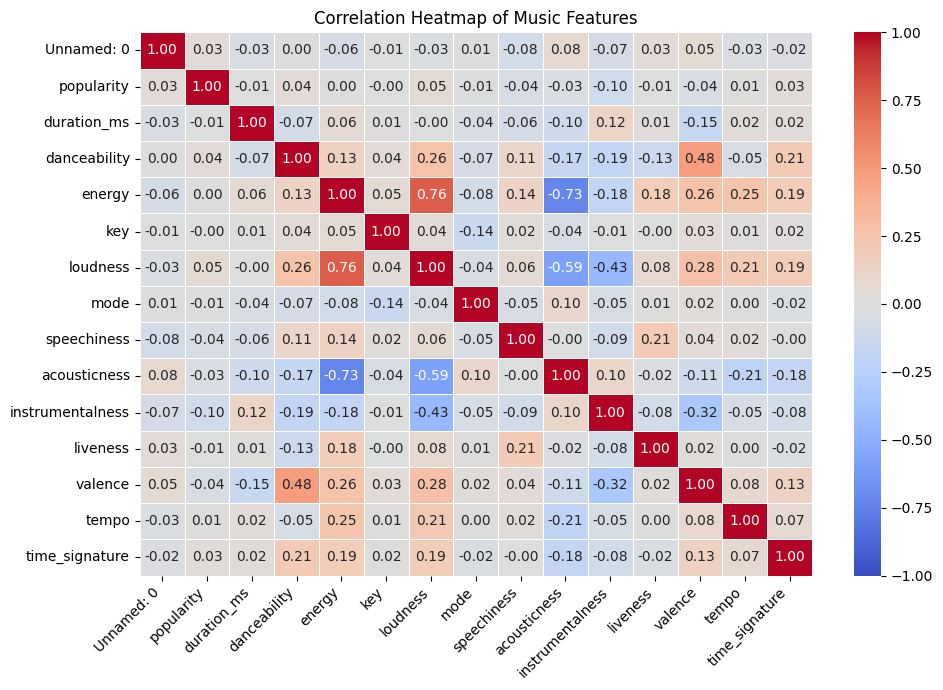

In [52]:
# correlation of columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_cols]

plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Music Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Data Wrangling
- Drop unnecessary columns (Unnamed:0, track_id)
- Drop high/low correlated columns
- Drop songs with irrelevant genre

In [53]:
df = df.drop(columns=['Unnamed: 0', 'track_id', 'popularity', 'key', 'mode', 'loudness', 
                              'speechiness', 'acousticness', 'instrumentalness', 
                              'liveness', 'time_signature'])

In [54]:
df.sample(n=5)

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,valence,tempo,track_genre
79960,McCoy Tyner,Today And Tomorrow,When Sunny Gets Blue,282320,False,0.427,0.1140,0.1140,60.484,piano
16250,Soolamangalam Sisters,Sri Skandha Guru Kavasam,Sri Skandha Guru Kavacham,1341746,False,0.640,0.4940,0.6680,116.006,classical
4529,Peter Sandberg,Balm,Who's There,157110,False,0.554,0.0782,0.0922,136.003,ambient
84072,The Beach Boys,Classic Christmas 2022,Little Saint Nick - 1991 Remix,118840,False,0.602,0.5530,0.9710,130.594,psych-rock
105115,shrub.beats,Uhmbiguity,Uhmbiguity,114943,False,0.800,0.4140,0.9530,85.996,study


#### Dealing with track's genre
- We want to drop genre that is irrelevant to user. From user's perspective, genre like kidsbop is irrelevent to user (at least they are not our target audience), and we will drop songs without vocal as well

In [55]:
df_unique = df['track_genre'].unique()
df_unique

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Only keeping mainstream genre without overwhelming users, there are 31 of them

In [56]:
# Drop rows where 'product_name' is NOT in the list
values_to_keep = ['pop', 'rock', 'hip-hop', 'electronic', 'classical', 'jazz', 'r-n-b', 'country',
                  'metal', 'indie', 'indie-pop', 'ambient', 'chill', 'happy', 'sad', 'study', 
                  'house', 'techno', 'edm', 'trance', 'k-pop', 'reggae', 'latin', 'j-pop',
                  'j-rock', 'punk', 'blues', 'folk', 'alternative', 'soul', 'disco']
df = df.drop(df[~df['track_genre'].isin(values_to_keep)].index)

In [57]:
df_unique = df['track_genre'].unique()
df_unique

array(['alternative', 'ambient', 'blues', 'chill', 'classical', 'country',
       'disco', 'edm', 'electronic', 'folk', 'happy', 'hip-hop', 'house',
       'indie-pop', 'indie', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'latin',
       'metal', 'pop', 'punk', 'r-n-b', 'reggae', 'rock', 'sad', 'soul',
       'study', 'techno', 'trance'], dtype=object)

In [58]:
len(df_unique)

31

### Finalise and save the dataset

In [59]:
# Save cleaned dataset to the data folder
df.to_csv('../data/cleaned_spotify_dataset.csv', index=False)